# US Accidents Exploratory Data Analysis
Dataset Source: kaggle

Name of dataset: US Accidents(2016-2021)

The Accident data are collected real-time from February 2016 to December 2021, using multiple Traffic APIs that provide streaming traffic incident(or event) data, covering 49 US states.            


In [1]:
## **1. Download the dataset**

## 2. Data Preparation and Cleaning
**bold text**
I. Basic Exploration

II. Check for NULL and Duplicate Values

III. Dealing with outliers

###  A. Basic Exploration


1. Import Needed packages

2. Look at the size, columns and sample rows

3. See the statistical summary
   
4. Inspect categorical values


##### 1. Import the needed packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/zachariah/Downloads/US_Accidents_Dec21_updated.csv')


##### 2. Look at the size, columns and sample rows

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [4]:
df.shape


(2845342, 47)

In [5]:
df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
##### 3. See the statistical summary


df.describe().round(2)


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.00,2845342.00,2845342.00,2845342.00,2845342.00,2845342.00,1101431.00,2776068.00,2375699.00,2772250.00,2786142.00,2774796.00,2687398.00,2295884.00
mean,2.14,36.25,-97.11,36.25,-97.11,0.70,8089.41,61.79,59.66,64.37,29.47,9.10,7.40,0.01
std,0.48,5.36,18.32,5.36,18.32,1.56,18360.09,18.62,21.16,22.87,1.05,2.72,5.53,0.09
min,1.00,24.57,-124.55,24.57,-124.55,0.00,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.45,-118.03,33.45,-118.03,0.05,1270.00,50.00,46.00,48.00,29.31,10.00,3.50,0.00
50%,2.00,36.10,-92.42,36.10,-92.42,0.24,4007.00,64.00,63.00,67.00,29.82,10.00,7.00,0.00
75%,2.00,40.16,-80.37,40.16,-80.37,0.76,9567.00,76.00,76.00,83.00,30.01,10.00,10.00,0.00
max,4.00,49.00,-67.11,49.08,-67.11,155.19,9999997.00,196.00,196.00,100.00,58.90,140.00,1087.00,24.00


In [8]:
# get the count of numerical columns

num_data = df.select_dtypes(include =['number'])
for colnames in num_data.columns:
  print(colnames)



Severity
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Number
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Speed(mph)
Precipitation(in)


In [9]:
#check length of numeric columns
len(num_data.columns)


14

In [10]:
##### 4. Inspect the categorical values

# get the categorical data

cat_data = df.select_dtypes(include = ['object'])

In [11]:
# Shows each categorical variable

for colname in cat_data.columns:
  print(colname)

ID
Start_Time
End_Time
Description
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Wind_Direction
Weather_Condition
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


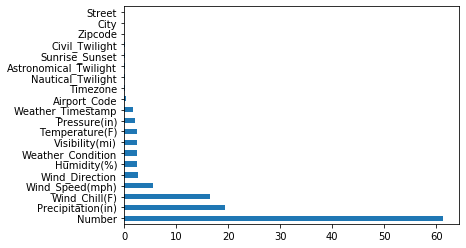

In [12]:
### B. Check for NULL and Duplicate Values

#check for Null Values

df.isnull().values.any()

# count of nulls per column

df.isnull().sum()

# Percentage of missing values per column and order in descending order

percentage_of_missing_values = (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100
percentage_of_missing_values

# find the data type of percentage_of_missing_values

type(percentage_of_missing_values)

# Now we remove all the columns which have O in the series percentage_of_missing_values

percentage_of_missing_values!=0

# Above we get boolean values true(if missing values) and false(if no missing values).
# we will use this as an index, and only get the features with missing values from the series percentage_of_missing_values

percentage_of_missing_values[percentage_of_missing_values!= 0]
# Now lets plot the missing values columns

percentage_of_missing_values[percentage_of_missing_values!= 0].plot(kind = 'barh')



In [13]:
# Drop the columns Country-- since the data is for US cities, there is only one country US.
# Drop the column Turning_Loop-- it has only one value- FALSE. This means that there is no Turning Loop near the accidents. 

df.drop(columns = ['Country','Turning_Loop'])


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [14]:
# Check for DUPLICATE values

len_before = df.shape[0]
df.drop_duplicates(inplace=True)
len_after = df.shape[0]

print(f"Before = {len_before}")
print(f"After = {len_after}")
print("")
print(f"Total Removed = {len_before - len_after}")


Before = 2845342
After = 2845342

Total Removed = 0


In [16]:
### C. Dealing with outliers

def get_outliers(df):
    '''Identify the number of outliers +/- 3 standard deviations. 
    Pass this function a dataframe and it returns a dictionary'''

    outs = {}

    df = df.select_dtypes(include=['int64'])


    for col in df.columns:

        # calculate summary statistics
        data_mean, data_std = np.mean(df[col]), np.std(df[col])

        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        # identify outliers
        outliers = [x for x in df[col] if x < lower or x > upper]

        outs[col] = len(outliers)

    return outs

#pass the dataframe into the function get_outliers to return the number of outliers.


get_outliers(df)

sns.histplot(x='Severity', data=df, bins=20, kde=True)


AttributeError: module 'seaborn' has no attribute 'histplot'

##**Exploratory Analysis and Visualization**

## **I. LOCATION ANALYSIS**

### 1. City Analysis


In [17]:
# Find the unique cities

Cities = df.City.unique()
len(Cities)


11682

In [18]:
# Get count of accidents for every city in the United States

Count_of_accidents = df.City.value_counts()
Count_of_accidents


Miami                  106966
Los Angeles             68956
Orlando                 54691
Dallas                  41979
Houston                 39448
                        ...  
Olaton                      1
Rector                      1
Phenix                      1
Winter Garden-Ocoee         1
Edgard                      1
Name: City, Length: 11681, dtype: int64

In [19]:
# Get the top 10 cities with highest count of accidents
Count_of_accidents[:10]


Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

In [20]:
# Check for 'New York' in the column city ( city is of datatype object)

print('New York' in df['City'].unique())


True


In [21]:
### Create a dataframe of Cities and the corresponding accident cases


city_df = pd.DataFrame(df['City'].value_counts().reset_index().rename(columns = {'index':'City','City':'Cases'}))

top_10_cities = city_df.head(10)
top_10_cities


,City,Cases
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152
6,Sacramento,32559
7,San Diego,26627
8,Raleigh,22840
9,Minneapolis,22768


In [22]:
# Calculate how much percentage the top 10 cities contribute to the total accidents in all the US cities(2016-2021)
Total10 = sum(top_10_cities['Cases'])
Total_accidents = sum(Count_of_accidents)
Total_percentage = (Total10/ Total_accidents) * 100
Total_percentage

15.815591495164671

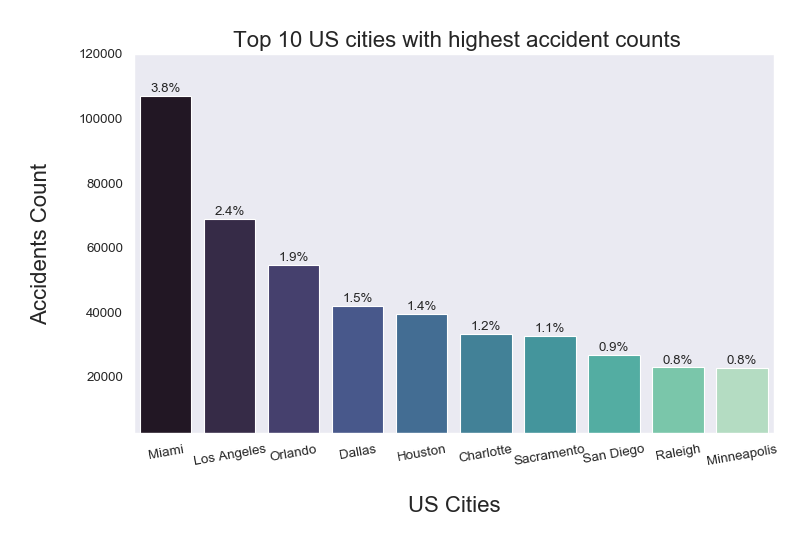

In [23]:
# Selecting style as white, dark, whitegrid, darkgrid   
# or ticks  
sns.set( style = "dark" ) 
fig, ax = plt.subplots(figsize = (10,7), dpi = 80)
ax = sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette= 'mako')
plt.ylim(2500,120000)
plt.xticks(rotation=10, fontsize =12)
plt.yticks(fontsize=12)
plt.title('\n Top 10 US cities with highest accident counts', fontsize=20)
ax.set_xlabel("\nUS Cities\n", fontsize=20)
ax.set_ylabel("\nAccidents Count\n", fontsize=20)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()


## **Observations:**

1. Miami has highest(3.8%) percentage of road accidents in US (2016-2021)
2. Los Angeles is the second highest(2.4%)
3. Out of the 11682 US cities, the top 10 Cities account for about 16% of the total accidents in the 5 years. (2016-2021)


In [24]:
City_name = city_df.City[0]
highest_cases = city_df.Cases[0]
print('Total accident cases in',City_name,'in last 5 years:', highest_cases)
print('Average Accident cases in ', City_name,'in last 5 years:', round(highest_cases/5))
print('Accident cases per day for past 5 years in', City_name, round(highest_cases/(5*365)))


Total accident cases in Miami in last 5 years: 106966
Average Accident cases in  Miami in last 5 years: 21393.0
Accident cases per day for past 5 years in Miami 59.0


## **Observation**

Miami averages about 59 accidents per day for the past 5 year period(2016-2021)


In [25]:
# find the US cities with highest and lowest count of accidents ( >= 1000, and < 1000)

High_accident_cities = Count_of_accidents[Count_of_accidents >= 1000]

Low_accident_cities = Count_of_accidents[Count_of_accidents < 1000]


In [26]:
# Plot the histogram of the high and low accident cities

sns.distplot(High_accident_cities)


sns.distplot(Low_accident_cities)

Both are exponentially decreasing graphs. So, we use a logarithmic scale for the graphs



sns.histplot(High_accident_cities, log_scale=True)


sns.histplot(Low_accident_cities, log_scale=True)


SyntaxError: invalid syntax (<ipython-input-26-f25fce66ee3e>, line 8)

In [27]:
# Lets check our above inference

City_count_1 = Count_of_accidents[Count_of_accidents==1]
len(City_count_1)


1110

## **Observations:**

As we see, there are 1110 US Cities with 1 accident. Seems like there could be issue with the data, maybe accidents are not been reported etc. So, we can choose to ignore any such data with value 1 for accident in our analysis.

Majority of the accident count is in the range of 10 to 100. 


In [28]:
# Find the number of high accident cities
len(High_accident_cities)


496

In [29]:
# Find the number of low accident cities
len(Low_accident_cities)


11185

In [30]:
# defining a function which can be used to get the percentages for different accident counts.

def city_acc_percent(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    
    
city_acc_percent(1, '=')
city_acc_percent(100, '<')
city_acc_percent(1000, '<')
city_acc_percent(1000, '>')
city_acc_percent(5000, '>')
city_acc_percent(10000, '>')


1110 Cities, 9.5%
8727 Cities, 74.71%
11185 Cities, 95.75%
494 Cities, 4.23%
71 Cities, 0.61%
34 Cities, 0.29%


## **Observations**
1. Only 4% of US Cities(494 cities) have accident counts of greater than 1000.
   
2. Around 96% of US cities (11185 cities) have an accident count of less than 1000.
   
3. 1110 cities (9.5%) have recorded only one accident in past 5 years.

4. About 75% (8725 cities) have less than 100 recorded accidents.

5. 71 cities have accident counts greater than 5000. (0.61%)

6. Only 34 cities have recorded accoidents greater than 10000


In [31]:
### 2. State Analysis

# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

abbrev_to_us_state 


{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'DC': 'District of Columbia

In [32]:
# Create dataframe of US States and their corresponding accident cases

states_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns = {'index': 'States','State':'Cases'})


In [33]:
# Define a function to convert the state codes to the state names

def con(x) : return abbrev_to_us_state[x]
states_df['States']= states_df['States'].apply(con)

top_ten = states_df.head(10)
top_ten


,States,Cases
0,California,795868
1,Florida,401388
2,Texas,149037
3,Oregon,126341
4,Virginia,113535
5,New York,108049
6,Pennsylvania,99975
7,Minnesota,97185
8,North Carolina,91362
9,South Carolina,89216


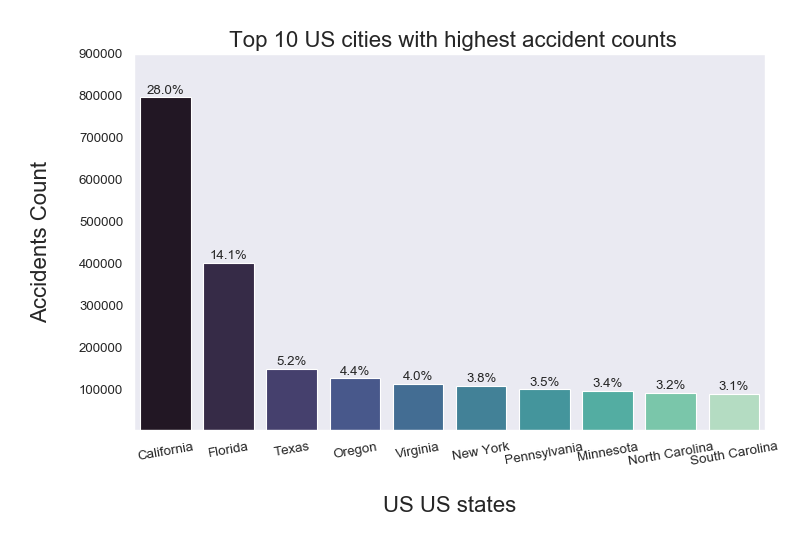

In [34]:
sns.set( style = "dark" ) 
fig, ax = plt.subplots(figsize = (10,7), dpi = 80)
ax = sns.barplot(y=top_ten['Cases'], x=top_ten['States'], palette= 'mako')
plt.ylim(2500,900000)
plt.xticks(rotation=10, fontsize =12)
plt.yticks(fontsize=12)
plt.title('\n Top 10 US cities with highest accident counts', fontsize=20)
ax.set_xlabel("\nUS US states\n", fontsize=20)
ax.set_ylabel("\nAccidents Count\n", fontsize=20)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()


In [35]:
# Create a new data frame to add the calculated percentage field to states_df dataframe

states_df['State_percent'] = round((states_df['Cases'] / states_df['Cases'].sum()) * 100, 2)

states_df
  

,States,Cases,State_percent
0,California,795868,27.97
1,Florida,401388,14.11
2,Texas,149037,5.24
3,Oregon,126341,4.44
4,Virginia,113535,3.99
5,New York,108049,3.80
6,Pennsylvania,99975,3.51
7,Minnesota,97185,3.42
8,North Carolina,91362,3.21
9,South Carolina,89216,3.14


In [36]:
Result_df = states_df[states_df['State_percent']<1.0]
Result_df


,States,Cases,State_percent
22,Colorado,25340,0.89
23,Ohio,24409,0.86
24,Indiana,20850,0.73
25,Alabama,19322,0.68
26,Montana,15964,0.56
27,Arkansas,10935,0.38
28,Iowa,9607,0.34
29,District of Columbia,9133,0.32
30,Kansas,9033,0.32
31,Oklahoma,8806,0.31


In [37]:
Result_df = states_df[states_df['Cases']<500]
Result_df


,States,Cases,State_percent
47,Vermont,365,0.01
48,South Dakota,201,0.01


In [38]:
def states_acc_count(val, operator):
    if operator == '<':
        Count_of_states = states_df[states_df['Cases']<val].shape[0]
        print(f'{Count_of_states} States less than {val} accidents')
        
  
    elif operator == '>':
        Count_of_states = states_df[states_df['Cases']>val].shape[0]
        print(f'{Count_of_states} States greater than {val} accidents')
        
  
    elif operator == '=':
        Count_of_states = states_df[states_df['Cases']==val].shape[0]
        print(f'{Count_of_states} States equal to {val} accidents')
        
    
  
states_acc_count(500,'<')
states_acc_count(5000, '<')
states_acc_count(26000, '<')
states_acc_count(10000,'<')
states_acc_count(10000, '>')
states_acc_count(50000, '>')
states_acc_count(100000, '>')


2 States less than 500 accidents
10 States less than 5000 accidents
27 States less than 26000 accidents
21 States less than 10000 accidents
28 States greater than 10000 accidents
14 States greater than 50000 accidents
6 States greater than 100000 accidents


## **Observations**
1. California has the highest accidents cases 28% (795868 accidents over 
   5 years)
2. Florida state is second highest with 14% of accident cases.
3. On average California has recorded 159174 accidents for last 5 years.
4. Recorded accidents per day for California is 436 cases, which averages about 18 accidents per hour.
5. All 49 states have reported accidents in the 5 years.
   46 states have percent of accidents less than 5%
6. 2 states( Vermont and South Dakota) have reported accidents less than 500 in last 5 years.
7. 27 states have reported less than 1% of accidents.
8. States reporting more than 100000 accidents are 6: 
   with following rankings
       
    1.	California	Cases(795868) 	   27.97%

    2.	Florida	    cases(401388)	   14.11%

    3.	Texas	      cases(149037)	    5.24%

    4.	Oregon	    cases(126341)	    4.44%

    5.	Virginia	  cases(113535)	    3.99%

    6.	New York	  cases(108049)	     3.80%  

   

In [39]:
### 3. Street Analysis

#Find which are the top 10 accident prone streets in US

street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street', 'Street':'Cases'})

#street_df['Street_percent'] = round((street_df['Cases'] / street_df['Cases'].sum()) * 100, 2)

street_df.head(10)


,Street,Cases
0,I-95 N,39853
1,I-5 N,39402
2,I-95 S,36425
3,I-5 S,30229
4,I-10 E,26164
5,I-10 W,25298
6,I-80 W,17545
7,I-80 E,16873
8,I-405 N,13708
9,I-15 N,12675


In [40]:
unique_streets = street_df['Street'].unique()
len(unique_streets)

159651

In [ ]:
sns.set( style = "dark" ) 
fig, ax = plt.subplots(figsize = (10,7), dpi = 80)
ax = sns.barplot(y=street_df['Cases'], x=street_df['Street'], palette= 'mako')
plt.ylim(2500,50000)
plt.xticks(rotation=0, fontsize =12)
plt.yticks(fontsize=12)
plt.title('\n Top 10 most accident prone streets in US', fontsize=20)
ax.set_xlabel("\n US streets\n", fontsize=20)
ax.set_ylabel("\nAccidents Count\n", fontsize=20)

plt.tight_layout()
plt.show()


## OBSERVATION
I-95 N is the most accident prone street followed by I-5 N for the years 2016-2021


In [ ]:
## **II.  TIME ANALYSIS**

### 1. Timezone Analysis

# Create dataframe with columns Timezone and cases

timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})
timezone_df

In [ ]:
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

ax=sns.barplot(y=timezone_df['Cases'], x=timezone_df['Timezone'], palette='viridis')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()-50000, \
            '{}%'.format(round(i.get_height()*100/total)), fontsize=15,weight='bold',
                color='black')
    

plt.ylim(-20000, 1500000)
plt.title('\nPercentage of Accident Cases for \ndifferent Timezone in US (2016-2020)\n', size=20, color='black')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='black')
plt.xlabel('\nTimezones\n', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)


## OBSERVATION:

Eastern time zone region of US has the highest no. of accident cases (43%) in past 5 years.

Mountain time zone region of US has the lowest no. of accident cases (6%) in past 5 years.


In [ ]:
### 2. Start latitude and start Longitude anlaysis

# Analysis based on Start_Lat and Start_Lng

# We import folium library to map using latitude and longitude

import folium
from folium import plugins
from folium.plugins import HeatMap
from branca.element import Figure   # resize our map by using the branca library 

fig=Figure(width=550,height=500) #Figure class for resizing our maps and pass the desired width and height in pixels:


In [ ]:
# Create a sample size of 0.001 % of the total data.
sample_df = df.sample(int(0.001 * len(df)))
sample_df.head()


In [ ]:
sample_df.Start_Lng

# Create scatter plot with sample points

sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size = 0.001)

In [ ]:
#### Use HeatMap to plot Start_Long and Start_lat on the map


# HeatMap needs a list of Lats and Longs ie List of lists [[lat,lon],[lat,lon].. [lat,lon]]
# Lets create a list of latitudes and longitudes usind list

list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))) 
# zip turns the list of lat and list of laong into pairs and list will these pairs into list of pairs of lat and long



map = folium.Map()
#fig.add_child(map)
HeatMap(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))).add_to(map)
map


## OBSERVATION
As seen on the map the accidents are more concentrated on both the east and west coast of United States. Since the dnsity of polulation is more along both the coast lines, it makes sense that more accidents occur along the coast rather than the central parts of US.


In [ ]:
### *Severity Analysis*

# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})
severity_df


In [ ]:
severity_df['Percentage'] = severity_df.Cases/sum(severity_df.Cases) * 100
severity_df

In [ ]:
sns.set( style = "dark" ) 
fig, ax = plt.subplots(figsize = (10,7), dpi = 80)
ax = sns.barplot(y=severity_df['Cases'], x=severity_df['Severity'], palette= 'mako')
plt.ylim(20000,2600000)
plt.xticks(rotation=10, fontsize =12)
plt.yticks(fontsize=12)
plt.title('\n Accidents with severity level from 1 to 4', fontsize=20)
ax.set_xlabel("\nSeverity Levels\n", fontsize=20)
ax.set_ylabel("\nAccidents Cases\n", fontsize=20)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()


## OBSERVATION

Based on the severity level of accidents, 1 is low severity and 4 is highest severity. 

89% of accidents are of severity level 2.

About 5% of accidents are of highest severity level of 4.

And less than 1% of accidents are of lowest severity level of 1.


In [ ]:
### 3. Start_Time Analysis

#### (a) DAYS of the WEEK

#### *Analyzing the frequency of occurence of accidents for hours in a day.*

# inspecting the first element of Column Start_Time

df.Start_Time[0]

# Check the datatype of column Start_Time
type_start_time = df.dtypes['Start_Time']
print(type_start_time)

In [ ]:
# Convert the datatype of Start_Time from Object To Date using to_datetime and write it back into the Start_Time column in the df
start_time_df = pd.to_datetime(df.Start_Time)
start_time_df


In [ ]:
# Check to see if the datatype for Start_Time is changed. As seen in the o/p, it is now Timestamp
df.Start_Time[0]

In [ ]:
#### HOURS of the DAY.

# Get the hour of the day from the Start_Time column with datatype Timestamp

df.Start_Time.dt.hour


In [ ]:
# Histogram of the hour, make bin size as 24 for the 24 hours in the day.

fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.histplot(df.Start_Time.dt.hour, bins = 24)
h.set_xlabel("Hour of the day", fontsize = 15)
h.set_ylabel("Total Accidents", fontsize = 15)


In [ ]:
# Plotting a distplot with sns and percent instead of count on yaxis using norm_hist = True, for every hour of the day.

fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(df.Start_Time.dt.hour, bins = 24, norm_hist = True, kde = False)
h.set_xlabel("Hour of the day", fontsize = 15)
h.set_ylabel("Percentage of accidents", fontsize = 15)


## OBSERVATION

Midnight to early morning, there are low percentage of accidents as compared later in the day between 3:00pm and 5:00pm, which appear to have the highest percentage of accidents.

Also, there is another accident time between 7:00am and 8:00am


In [ ]:
# Plotting distplot for day of the week(0 - Monday, 1= Tuesday...5= Saturday, 6= Sunday)

fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, norm_hist = True, kde = False)
h.set_xlabel("Days of the day", fontsize = 15)
h.set_ylabel("Percentage of Accidents", fontsize = 15)



## OBSERVATION

On weekends the number of accidents is lower than on weekdays. 

Highest percentage of accidents occur on Friday. And the least percentage of accidents are on Sunday.


In [ ]:
# check the accident count for Sunday
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]


In [ ]:
# Plot the graph
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(sunday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
h.set_xlabel("Sunday hours ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


## OBSERVATION
On sundays, there is a spreadout distribution. 
During the afternoons, 2:00PM -5:00PM, most accidents occur. 


In [ ]:
# checking the accidents distribution for Monday and plotting a graph
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(monday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
h.set_xlabel("Monday hours ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


## OBSERVATION
Here we see that the trend for Monday accident pattern is quite different than Sunday. 

On sunday, more accidents occur beginning in the morning at 10:00 and going through the earlier morning hours. 

Whereas, on Monday, the most accidents occur during the morning time between 7:00am and 8:00 am. And then later in the day between 3:00pm and 6:00pm. 
The least number of accidents are during the night time.

In [ ]:
tuesday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 1]
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(tuesday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)

h.set_xlabel("Tuesday hours ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
wednesday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h =sns.distplot(wednesday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
h.set_xlabel("Wednesday hours ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
thursday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 3]
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(thursday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
h.set_xlabel("Thursday hours ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
friday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(friday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
h.set_xlabel("Friday hours ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(friday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
h.set_xlabel("Saturday hours ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


## OBSERVATION
As Seen in the graph plots for each of the days of the week. 

The number of accidents peak on Sundays between 10:am and 3:00pm,
whereas the accidents peak at two different times during the weekday: one peak is morning 7:00am - 8:00am( morning rush hour) and secong peak is in the evening between 3:00pm -6:00pm(evening rush hour)

Interesting enough, the weekday accident pattern follows also on Saturday. 


In [ ]:
#### (b) MONTHS of the YEARS(2016-2021)


###### Analyzing the accident count for 12 months for the duration 2016 to 2021. 
###### Find which month has the highest count for accidents.

#Plot graph for months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(df.Start_Time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Total Accidents months in the years 2016-2021")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage of Accidents", fontsize = 15)


## OBSERVATIONS:

We find that DECEMBER has the highest percentage of accidents over the duration of 2016-2021.

The next highest percentage is month of November.

Since our data is missing the month of Jabiuary 2016, we might assume we have some missing records. 

There is a fall in accidents in July (summer) and gradual rise follows in August, September, October, November, with the peak accidents in December. And again a fall in accidents in January, with almost steady number until May. 


In [ ]:
####  Finding the accident percentages for each day of the week for every month for the duration 2016-2021

# Plot graph for Day of the week Monday for all 12 months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(monday_start_time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Accidents on Monday")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
#Plot graph for Day of the week Tuesday for all 12 months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(tuesday_start_time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Accidents on Tuesday")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
#Plot graph for Day of the week Wednesday for all 12 months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(wednesday_start_time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Accidents on Wednesday")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)



In [ ]:
#Plot graph for Day of the week Thursday for all 12 months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(thursday_start_time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Accidents on Thursday")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
#Plot graph for Day of the week Friday for all 12 months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(friday_start_time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Accidents for Friday")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
#Plot graph for Day of the week Saturday for all 12 months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(saturday_start_time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Accidents for Saturday")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


In [ ]:
#Plot graph for Day of the week Sunday for all 12 months of the year from 2016 until 2021
fig, ax = plt.subplots(figsize = (9,6), dpi = 80)

h = sns.distplot(sunday_start_time.dt.month, bins = 12, norm_hist = True, kde = False)
h.set_title(" Accidents for Sunday")
h.set_xlabel("Months ", fontsize = 15)
h.set_ylabel("Percentage Accidents", fontsize = 15)


## OBSERVATION
Looking at the plots, we can infer that the month of December has the highest number of accidents for all years from Feb 2016 to Dec 2021. 


In [ ]:
#### (c) YEARS (2016-2021)

year_df = pd.DataFrame(start_time_df.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

year_df




In [ ]:
fig, ax = plt.subplots(figsize = (10,4), dpi = 80)

ax=sns.barplot(y=year_df['Cases'], x=year_df['Year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-50000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='black')

plt.ylim(10000, 2000000)
plt.title('\nRoad Accident Percentage \nover past 5 Years in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

# OBSERVATION
1. The percentage of accidents is highest in 2021. (53.13%), which might also be because people started going about their normal lives after 2020 quarantine.
2. In comparison, during Covid year 2020, the percentage was only 22.0%,     which was due to people been quarantined at home.  
3. The data for 2016, might not be complete data for that year. 
4. On average, the accident percentages were very stable for 2017, 2018, slightly increased in 2019. 
5. In comparison, there was quite a jump in accidents in 2020, as compared to previous year. (might need to explore more as to why?)



In [ ]:
### (4) Sunrise - Sunset Analysis

### Are there more accidents during the day or night? 


# Create a new data frame to add the calculated percentage field to period_df dataframe

period_df = pd.DataFrame(df['Sunrise_Sunset'].value_counts()).reset_index().rename(columns={'index':'Sunrise_Sunset', 'Sunrise_Sunset':'Cases'})

period_df['Period_percent'] = round((period_df['Cases'] / period_df['Cases'].sum()) * 100, 2)

period_df



## OBSERVATION

There are more accidents during the Day than during Night.

The percentage of accidents during the day is 63.74%, which almost double the percentage during night (36.26%)


In [ ]:
## **III. Road Condition Analysis**

Road landmarks: (All are boolean)

Bump

Crossing

Give_Way

Junction

No_Exit

Railway

Roundabout

Station

Stop

Traffic_Calming

Traffic_Signal


We want to find if the road landmarks play a role in the number of accidents

# Create a new dataframe to analyse the Road landmarks using copy()
road_df = df[['Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']].copy()

road_df

                                        
# Create a copy of DataFrame
road_copy_df = road_df.copy()
# Transform all columns to integers
road_copy_df = road_copy_df.astype(int)
# Print updated pandas DataFrame
print(road_copy_df)

# Count number of zeros in all columns of Dataframe
# Presence of zeros means no existence of the particular road landmark that results in the accidents


cols = ['road_landmark', 'Missing']
lst = []
for column_name in road_copy_df.columns:
    column = road_copy_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    lst.append([column_name, count])
df1 = pd.DataFrame(lst, columns=cols)
df1

# Count number of ones in all columns of Dataframe
# Presence of ones means existence of the particular road landmark that results in the accident

cols = ['road_landmark', 'Present']
lst = []
for column_name in road_copy_df.columns:
    column = road_copy_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 1).sum()
    lst.append([column_name, count])
df2 = pd.DataFrame(lst, columns=cols)
df2

# merging the data frames df1 and df2 on the common column road_landmark
# DataFrame gives information on Number of accidents that take take when the particular landnark is present or missing

road_landmark_df = pd.merge(df1, df2, on="road_landmark")
road_landmark_df


## OBSERVATION

The absence of Road landmarks like Bumps, Give_way, No_Exit, Roundabout, Traffic_Calming have caused 100% of the accidents.

There are also more accidents reported at Traffic signals, stop signs, junctions, crossings.

There are no accidents reported at turning loops

And very low number reported at the prescence of roundabout, No_Exit, Bump on the road.


In [ ]:
# Create a copy of DataFrame
road_copy_df = road_df.copy()
# Transform all columns to integers
road_copy_df = road_copy_df.astype(int)
# Print updated pandas DataFrame
print(road_copy_df)

In [ ]:
# Count number of zeros in all columns of Dataframe
# Presence of zeros means no existence of the particular road landmark that results in the accidents


cols = ['road_landmark', 'Missing']
lst = []
for column_name in road_copy_df.columns:
    column = road_copy_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    lst.append([column_name, count])
df1 = pd.DataFrame(lst, columns=cols)
df1


In [ ]:
 Count number of ones in all columns of Dataframe
# Presence of ones means existence of the particular road landmark that results in the accident

cols = ['road_landmark', 'Present']
lst = []
for column_name in road_copy_df.columns:
    column = road_copy_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 1).sum()
    lst.append([column_name, count])
df2 = pd.DataFrame(lst, columns=cols)
df2


In [ ]:
# merging the data frames df1 and df2 on the common column road_landmark
# DataFrame gives information on Number of accidents that take take when the particular landnark is present or missing

road_landmark_df = pd.merge(df1, df2, on="road_landmark")
road_landmark_df



## OBSERVATION

The absence of Road landmarks like Bumps, Give_way, No_Exit, Roundabout, Traffic_Calming have caused 100% of the accidents.

There are also more accidents reported at Traffic signals, stop signs, junctions, crossings.

There are no accidents reported at turning loops

And very low number reported at the prescence of roundabout, No_Exit, Bump on the road.


# Future ideas for further analysis on the US accidents data:

1. How the weather conditions affect the accident counts?
2. Study the accident hotspot locations.
3. Geospatial Analysis Using folium to map the accidents in the different regions of US.
4. Study the impact of COVID 19 on traffic behavior and accidents
5. Find the accidents per capita.
